In [ ]:
from tensorflow import keras
from keras import models

from keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error as mse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd


auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)


worksheet = gc.open('DS').sheet1


rows = worksheet.get_all_values()


df = pd.DataFrame(rows[1:], columns=rows[0])
df = df.astype({'INPUT':'float'})
df = df.astype({'OUTPUT':'float'})
df.head()

,INPUT,OUTPUT
0,5.0,2.0
1,10.0,3.0
2,15.0,4.0
3,20.0,5.0
4,25.0,6.0


In [ ]:
df

,INPUT,OUTPUT
0,5.0,2.0
1,10.0,3.0
2,15.0,4.0
3,20.0,5.0
4,25.0,6.0
5,30.0,7.0
6,35.0,8.0
7,40.0,9.0
8,45.0,10.0
9,50.0,11.0


In [ ]:
df.describe()

,INPUT,OUTPUT
count,20.000000,20.00000
mean,52.500000,11.50000
std,29.580399,5.91608
min,5.000000,2.00000
25%,28.750000,6.75000
50%,52.500000,11.50000
75%,76.250000,16.25000
max,100.000000,21.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INPUT   20 non-null     float64
 1   OUTPUT  20 non-null     float64
dtypes: float64(2)
memory usage: 448.0 bytes


In [ ]:
X = df.iloc[: , : -1].values
y = df.iloc[: , -1].values

In [ ]:
X

array([[  5.],
       [ 10.],
       [ 15.],
       [ 20.],
       [ 25.],
       [ 30.],
       [ 35.],
       [ 40.],
       [ 45.],
       [ 50.],
       [ 55.],
       [ 60.],
       [ 65.],
       [ 70.],
       [ 75.],
       [ 80.],
       [ 85.],
       [ 90.],
       [ 95.],
       [100.]])

In [ ]:
y

array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
       15., 16., 17., 18., 19., 20., 21.])

In [ ]:
X.shape

(20, 1)

In [ ]:
y.shape

(20,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train.shape

(13, 1)

In [ ]:
y_train.shape

(13,)

In [ ]:
X_test.shape

(7, 1)

In [ ]:
y_test.shape

(7,)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train.reshape(-1,1))

MinMaxScaler()

In [ ]:
X_train1 = scaler.transform(X_train.reshape(-1,1))

In [ ]:
n = models.Sequential([layers.Dense(units = 1 , activation = 'relu' , input_shape = [1]),
                       layers.Dense(units = 3, activation = 'relu'),
                       layers.Dense(units = 3 , activation = 'relu' ),
                       layers.Dense(units = 3 , activation = 'relu'),
                       layers.Dense(units = 1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
n.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_35 (Dense)                     │ (None, 1)                   │               2 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 3)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 3)                   │              12 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36 (144.00 B)

 Trainable params: 36 (144.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
n.compile(optimizer = 'rmsprop' , loss = 'mse')

In [ ]:
n.fit(X_train1 , y_train , epochs = 500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 175.7176
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 175.3515
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 175.0785
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 174.8463
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 174.6375
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 174.4438
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 174.2606
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 174.0852
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 173.9157
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 173.7506
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 173.5890
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 173.4302
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 173.2734
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 173.1182
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss:

In [ ]:
loss = pd.DataFrame(n.history.history)

<Axes: >

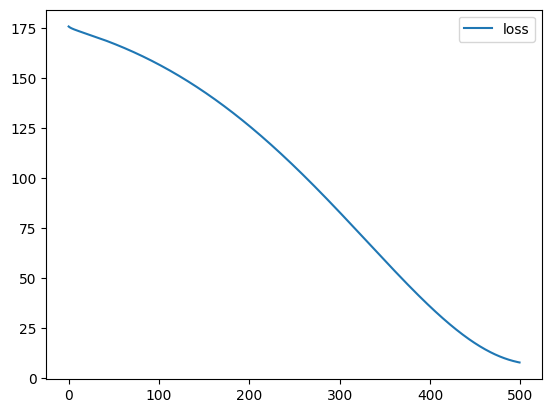

In [ ]:
loss.plot()

In [ ]:
X_test1 = scaler.fit_transform(X_test)

In [ ]:
n.evaluate(X_test1 , y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - loss: 11.7936


11.793624877929688

In [ ]:
i = [[30]]

In [ ]:
i = scaler.fit_transform(i)

In [ ]:
n.predict(i)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


array([[7.6518145]], dtype=float32)